In [1]:
import pandas as pd
import os
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import seaborn as sns

In [2]:
FOLDER = "results/"

In [3]:
no_interaction = pd.read_csv(f"results/no_interaction.csv", index_col=0)
no_interaction = no_interaction[
    ["States", "train_error_custom", "test_error_custom", "average_variance_custom"]
].set_index("States")

In [4]:
no_interaction

,train_error_custom,test_error_custom,average_variance_custom
States,,,
Alaska,1.713760,4.738674,5.564479
Alabama,0.612509,1.037147,5.463056
Arkansas,0.364159,0.444898,3.675457
Arizona,1.082644,1.162652,4.027764
California,0.572977,1.682737,5.721593
Colorado,0.551891,0.321300,4.364733
Connecticut,0.437749,0.143692,4.237082
District of Columbia,0.512980,0.350821,3.971581
Delaware,0.774085,1.478820,3.931093


In [5]:
STATES = [
    'Alaska',
    'Alabama',
    'Arkansas',
    'Arizona',
    'California',
    'Colorado',
    'Connecticut',
    'District of Columbia',
    'Delaware',
    'Florida',
    'Georgia',
    'Hawaii',
    'Iowa',
    'Idaho',
    'Illinois',
    'Indiana',
    'Kansas'
]

## Between-state Flows

In [6]:
# Add a migration matrix that shows travel flows amongst states
population = pd.read_excel(
    "./Data/Population/US_population_raw_data.xls",
)
STATE_POPULATION = dict(zip(population[1:].Location, population[1:].COVIDTotal))
pops = [STATE_POPULATION[s] for s in STATES]
pops = np.array(pops)

state_migration = pd.read_csv("./Data/US Census/State_to_State_Migrations_Table_2019.csv", index_col=0)
state_migration.fillna(0, inplace=True)
state_migration = state_migration.astype("int")
state_migration = state_migration.loc[state_migration.index.isin(STATES), state_migration.columns.isin(STATES)]
#state_migration = state_migration.div(pops, axis=0) # No need to normalise for now. Maybe later. 
state_migration

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas
Alabama,0,1105,904,813,3690,2042,705,0,248,15519,13993,668,0,1962,3451,722,1212
Alaska,260,0,886,12,2547,685,153,224,69,2473,743,217,1644,952,0,143,1296
Arizona,1750,1561,0,1022,59713,14684,895,653,239,7358,3947,4942,2961,10915,3156,2982,3742
Arkansas,636,98,692,0,4967,1585,87,0,295,2118,1352,118,157,1308,438,674,1139
California,3310,5064,28226,3104,0,15085,4067,1630,3075,22692,14496,11985,4372,24085,4923,1956,2941
Colorado,3422,862,10616,1022,29350,0,942,0,259,14124,6985,2782,798,10153,3114,2589,6544
Connecticut,248,220,441,0,4049,1165,0,45,313,7501,1266,912,0,1389,309,165,94
Delaware,0,294,0,0,161,530,415,0,442,939,344,0,0,562,0,0,189
District of Columbia,462,338,291,0,3437,870,1298,0,0,1496,1190,0,28,1361,427,59,41
Florida,15153,4906,7054,3544,28628,13656,13227,3083,2705,0,49681,4103,1032,24425,18175,3669,1813


## Spatial distance between states

In [7]:
# State spatial distance
state_distance = pd.read_csv("./Data/US Census/us_state_spatial_distance.csv", index_col=0)
state_distance = state_distance.loc[state_distance.index.isin(STATES), state_distance.columns.isin(STATES)]
state_distance

,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Alaska,District of Columbia,Hawaii
Alabama,0,1217,305,1628,1505,1354,1030,529,248,2352,737,701,1041,1016,0,0,0
Arizona,1217,0,940,435,645,2953,2698,2245,2080,1036,1747,1947,1543,1059,0,0,0
Arkansas,305,940,0,1337,1046,1595,1308,971,695,1893,565,672,719,562,0,0,0
California,1628,435,1337,0,1049,3475,3248,2887,2697,807,2254,2466,1980,1566,0,0,0
Colorado,1000,429,695,697,0,2427,2209,1999,1739,867,1206,1420,938,529,0,0,0
Connecticut,900,1962,1060,2309,2427,0,334,1438,1185,3097,1221,1011,1528,1912,0,0,0
Delaware,685,1793,869,2158,2209,334,0,1110,853,2932,1013,797,1359,1683,0,0,0
Florida,352,1492,645,1918,1999,1438,1110,0,395,2858,1229,1138,1561,1533,0,0,0
Georgia,165,1382,462,1792,1739,1185,853,395,0,2576,843,743,1189,1237,0,0,0
Idaho,1563,689,1258,536,867,3097,2932,2858,2576,0,1924,2137,1575,1340,0,0,0


## Covid local state responses 

In [8]:
mobility_data = pd.read_csv(
    "./Data/Google/Global_Mobility_Report.csv", 
    encoding="ISO-8859-1", 
    parse_dates=["date"],
    dayfirst=True
)
mobility_data_us = mobility_data[
    (mobility_data["country_region"]=="United States") & 
    (~mobility_data["sub_region_1"].isnull()) &
    (mobility_data["sub_region_2"].isnull())
]
mobility_data_us_temp = mobility_data_us.iloc[:,7:] # keep only relevant columns
mobility_data_us_temp["state"] = mobility_data_us["sub_region_1"]
mobility_data_us_temp.iloc[:,1:-1] = mobility_data_us_temp.iloc[:,1:-1].apply(lambda x: x/100 + 1)
mobility_data_us =  mobility_data_us_temp.reset_index(drop=True)
mobility_data_us = pd.DataFrame({
    "state": mobility_data_us["state"],
    "date": mobility_data_us["date"],
    "HOME": mobility_data_us['residential_percent_change_from_baseline'],
    "WORK": mobility_data_us['workplaces_percent_change_from_baseline'],
    "RECREATIONAL": mobility_data_us['retail_and_recreation_percent_change_from_baseline'],
    "OTHER": mobility_data_us.iloc[:,2:5].mean(axis=1)
})
mobility_data_us = pd.DataFrame(mobility_data_us[["state", "HOME", "WORK", "RECREATIONAL"]].groupby(["state"]).median()).T

/Users/georgiospapadopoulos/opt/anaconda3/envs/tensorflow_mac/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
mobility_data_us

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas
HOME,1.085,1.06,1.12,1.07,1.140,1.10,1.12,1.110,1.195,1.115,1.11,1.135,1.055,1.110,1.08,1.08,1.08
WORK,0.720,0.74,0.63,0.72,0.590,0.61,0.62,0.640,0.410,0.655,0.64,0.650,0.710,0.620,0.70,0.71,0.70
RECREATIONAL,0.900,1.03,0.77,0.94,0.655,0.82,0.83,0.885,0.460,0.750,0.85,0.630,0.980,0.785,0.94,0.91,0.91


## Create Exploratory Plots

In [12]:
changes = defaultdict(dict)

def plot_change_for_state(state):
    results = {}
    for c in (c for c in combinations(STATES, 2) if c[0] == state or c[1] == state):
        other = c[1] if c[1] != state else c[0]
        df = pd.read_csv(f"results/{c[0]}_{c[1]}_interaction.csv", index_col=0)
        df = df[df["States"] == state]
        df = df[["train_error_custom", "test_error_custom", "average_variance_custom"]]
        results[other] = list(df.to_dict('index').values())[0]

    assert len(results) == 16, state
        
    results = pd.DataFrame(results).T

    fig, axs = plt.subplots(8, 1, figsize=(15, 20), sharex=True) # Changed to 8 plots per state, to include migration flows, state distance + local response (mobility data)
    fig.suptitle(state, fontsize=16)

    for i, att in enumerate(["train_error_custom", "test_error_custom", "average_variance_custom"]):
        change = np.array((no_interaction.loc[state].to_dict()[att] - results[att]) / no_interaction.loc[state].to_dict()[att])
        
        changes[att][state] = dict(zip(results.index, change))
        changes[att][state][state] = 0.0
        
        axs[i].axhline(y = 0, lw=0.5)
        axs[i].bar(results.index, np.ma.masked_less_equal(change, 0), color="r")
        axs[i].bar(results.index, np.ma.masked_where(change>0, change), color="g")
        axs[i].set_ylim([-np.max(np.abs(change))*1.1, np.max(np.abs(change))*1.1])
        axs[i].set_title(att)

    # After the loop, the last axis go to the migration flows, state distance + local response
    flows = state_migration.loc[state_migration.index==state, results.index].to_numpy()[0]
    axs[3].bar(results.index, flows)
    axs[3].set_title("Migration flows")

    dist = state_distance.loc[state_distance.index==state, results.index].to_numpy()[0]
    axs[4].bar(results.index, dist)
    axs[4].set_title("State distance")

    HOME = mobility_data_us.loc["HOME", results.index]
    axs[5].bar(results.index, HOME)
    axs[5].set_title("HOME")

    WORK = mobility_data_us.loc["WORK", results.index]
    axs[6].bar(results.index, WORK)
    axs[6].set_title("WORK")

    RECREATIONAL = mobility_data_us.loc["RECREATIONAL", results.index]
    axs[7].bar(results.index, RECREATIONAL)
    axs[7].set_title("RECREATIONAL")

    axs[7].set_xticklabels(labels=results.index,rotation=90);
    

<ipython-input-12-76f150dc8cb7>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[7].set_xticklabels(labels=results.index,rotation=90);


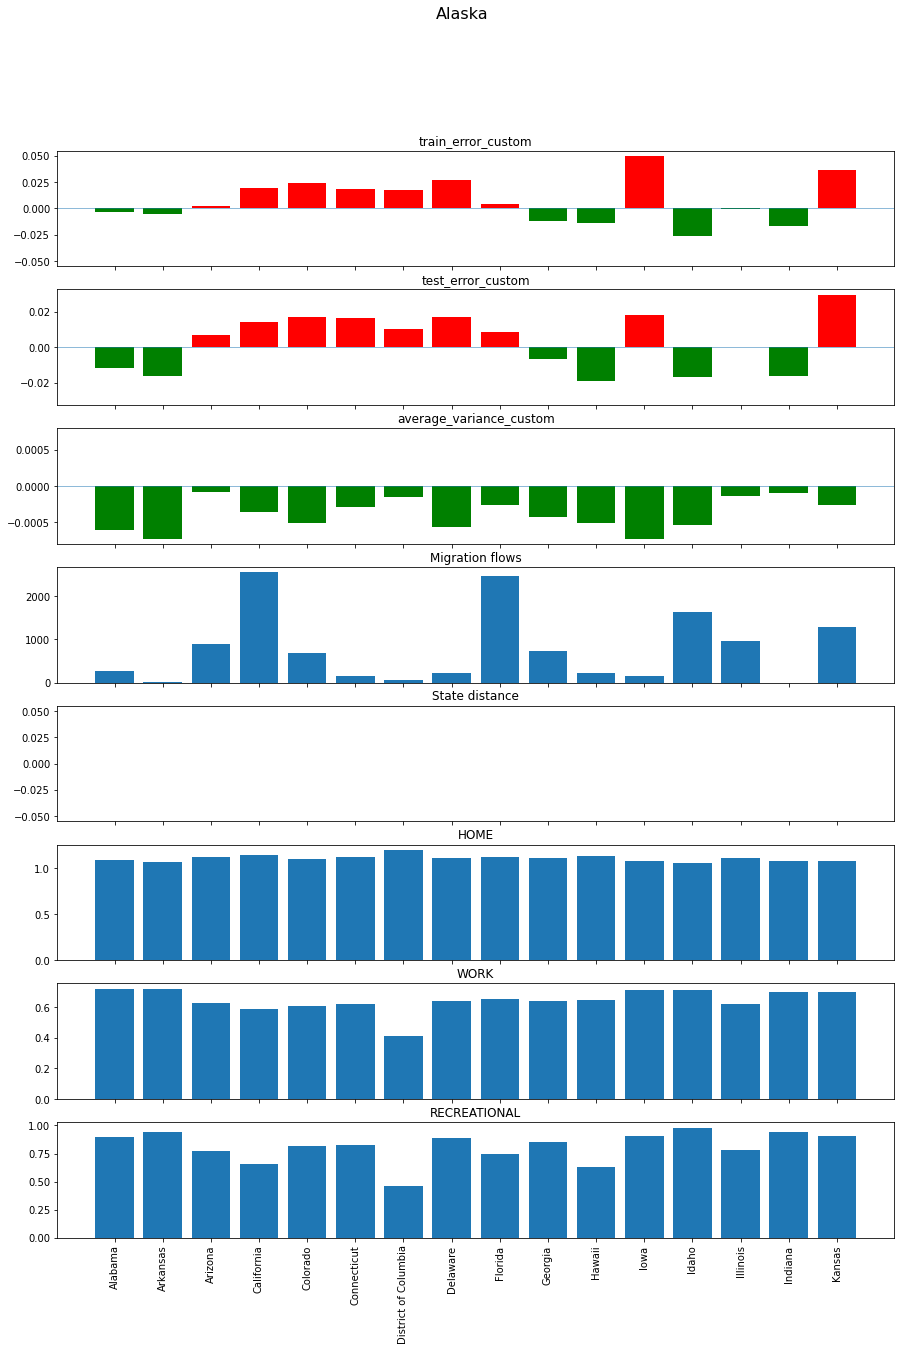

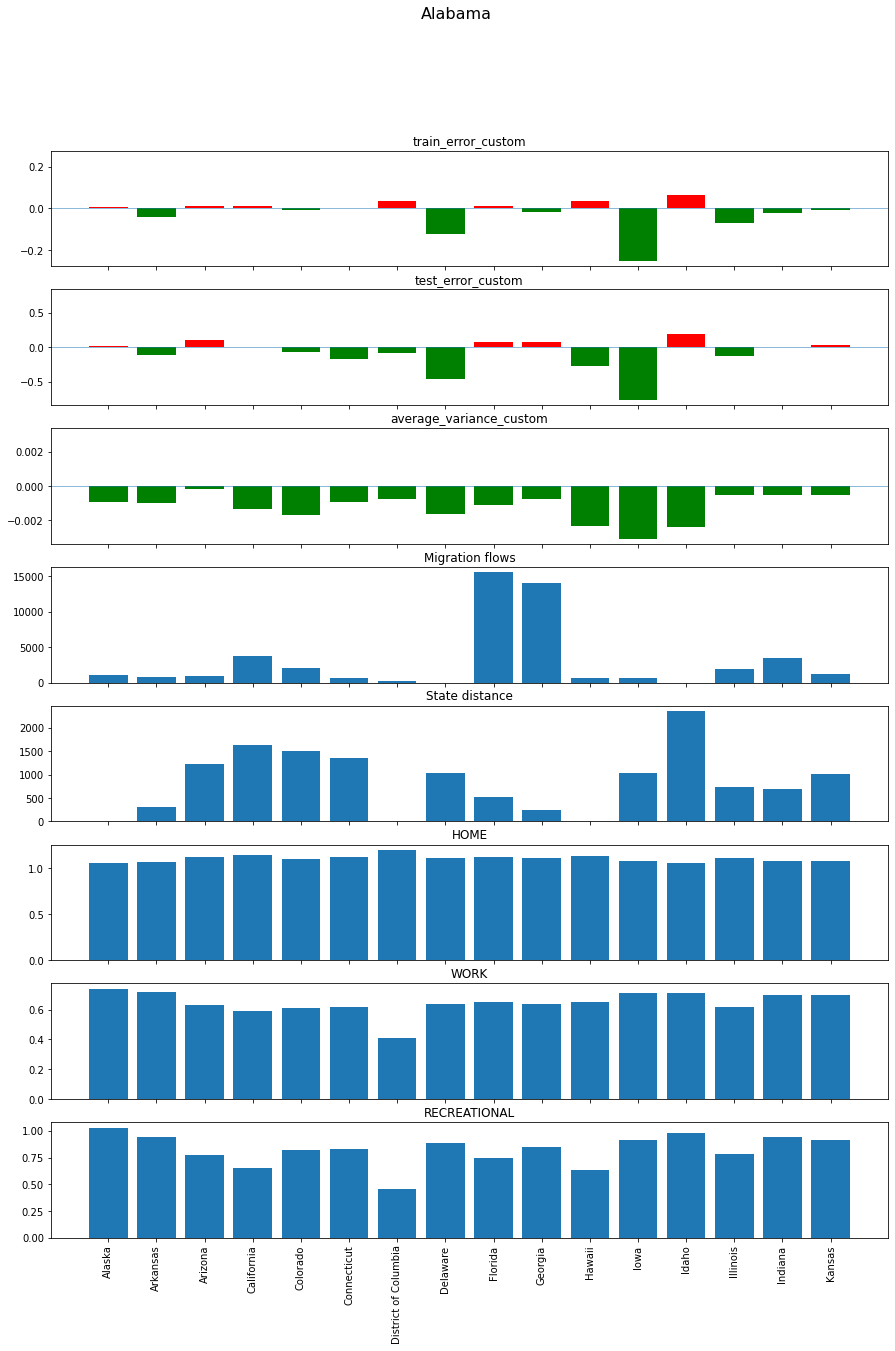

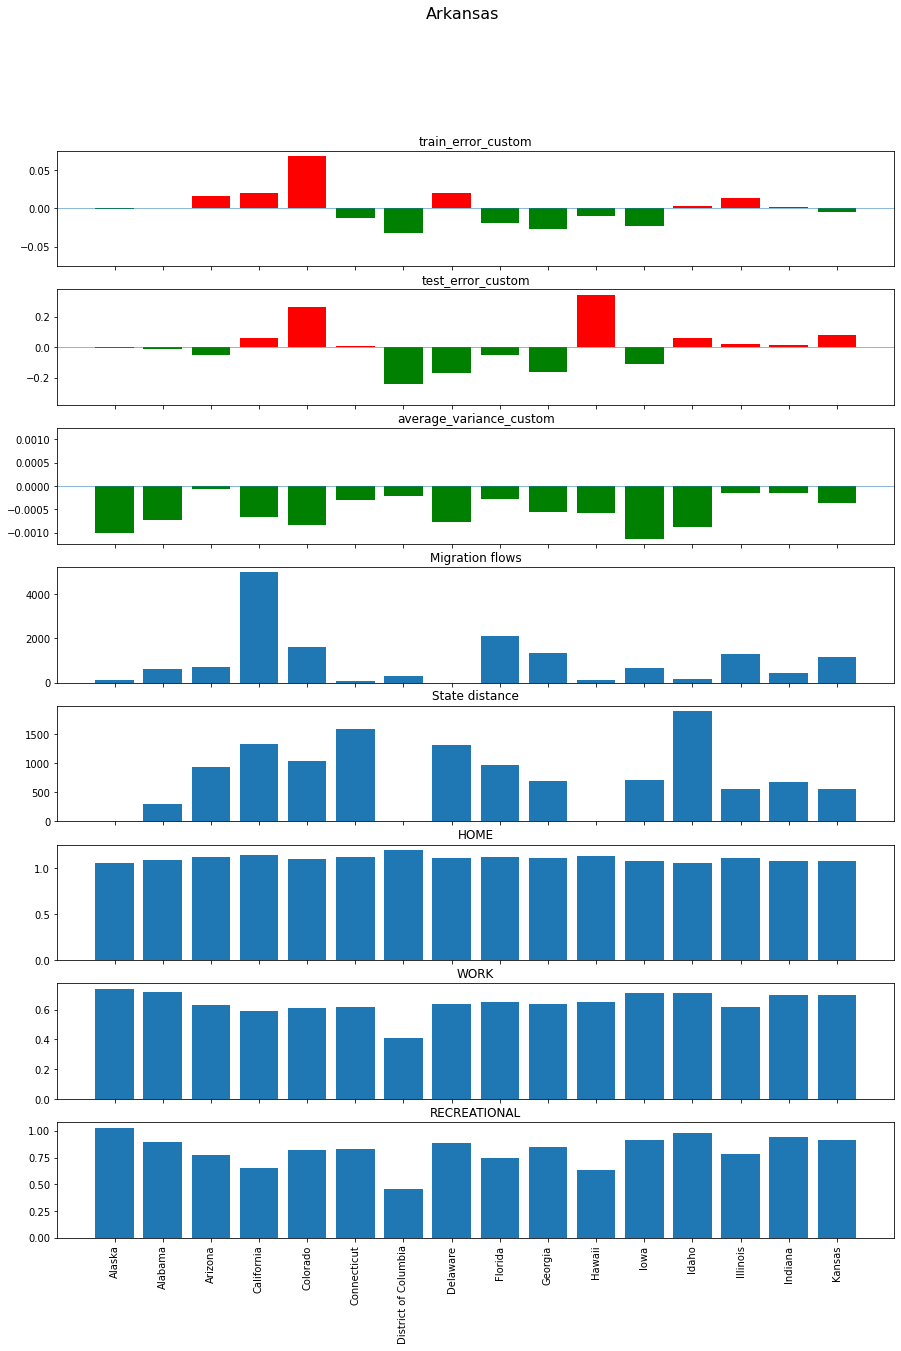

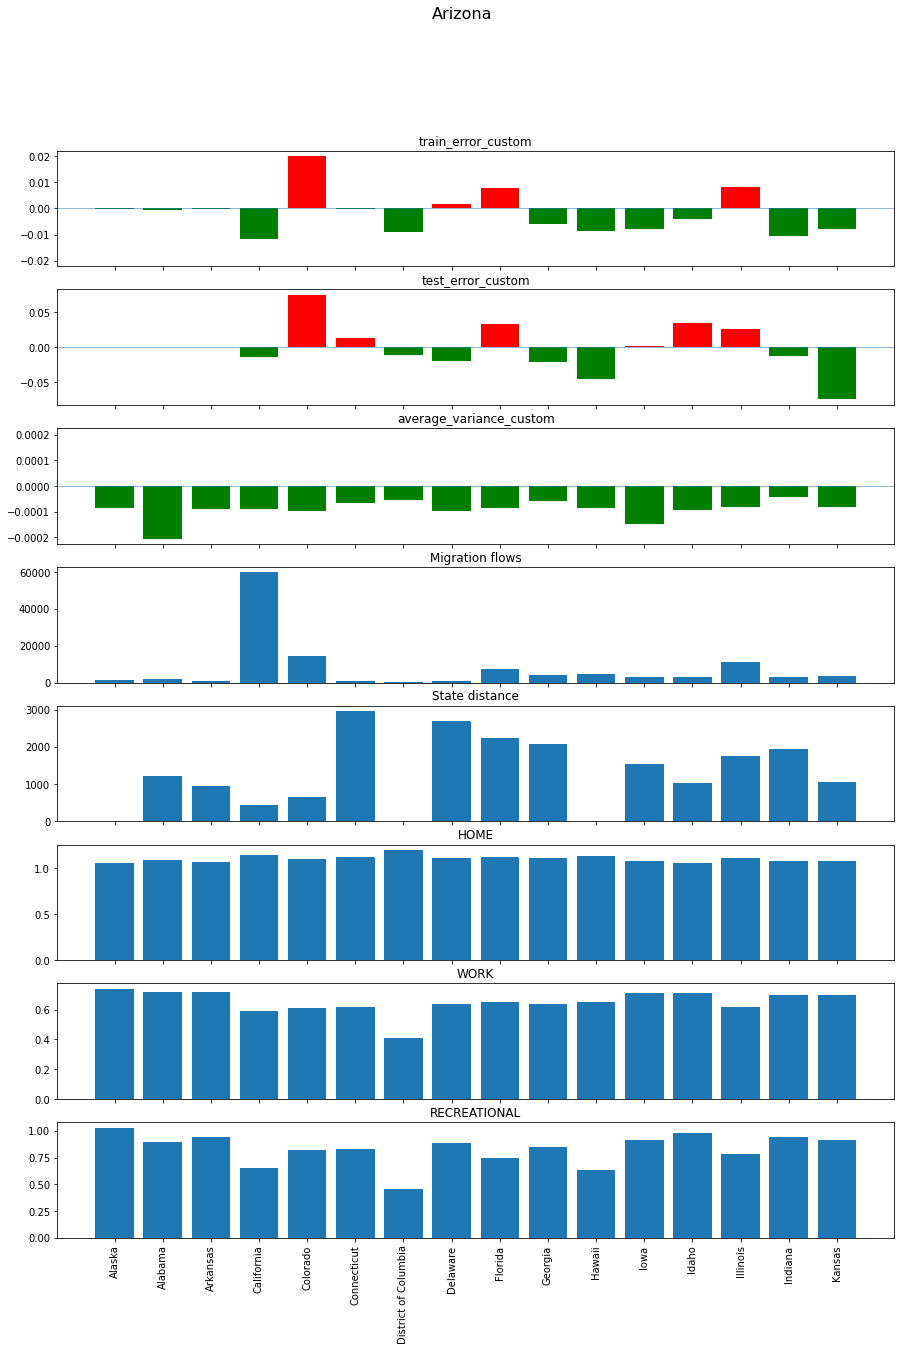

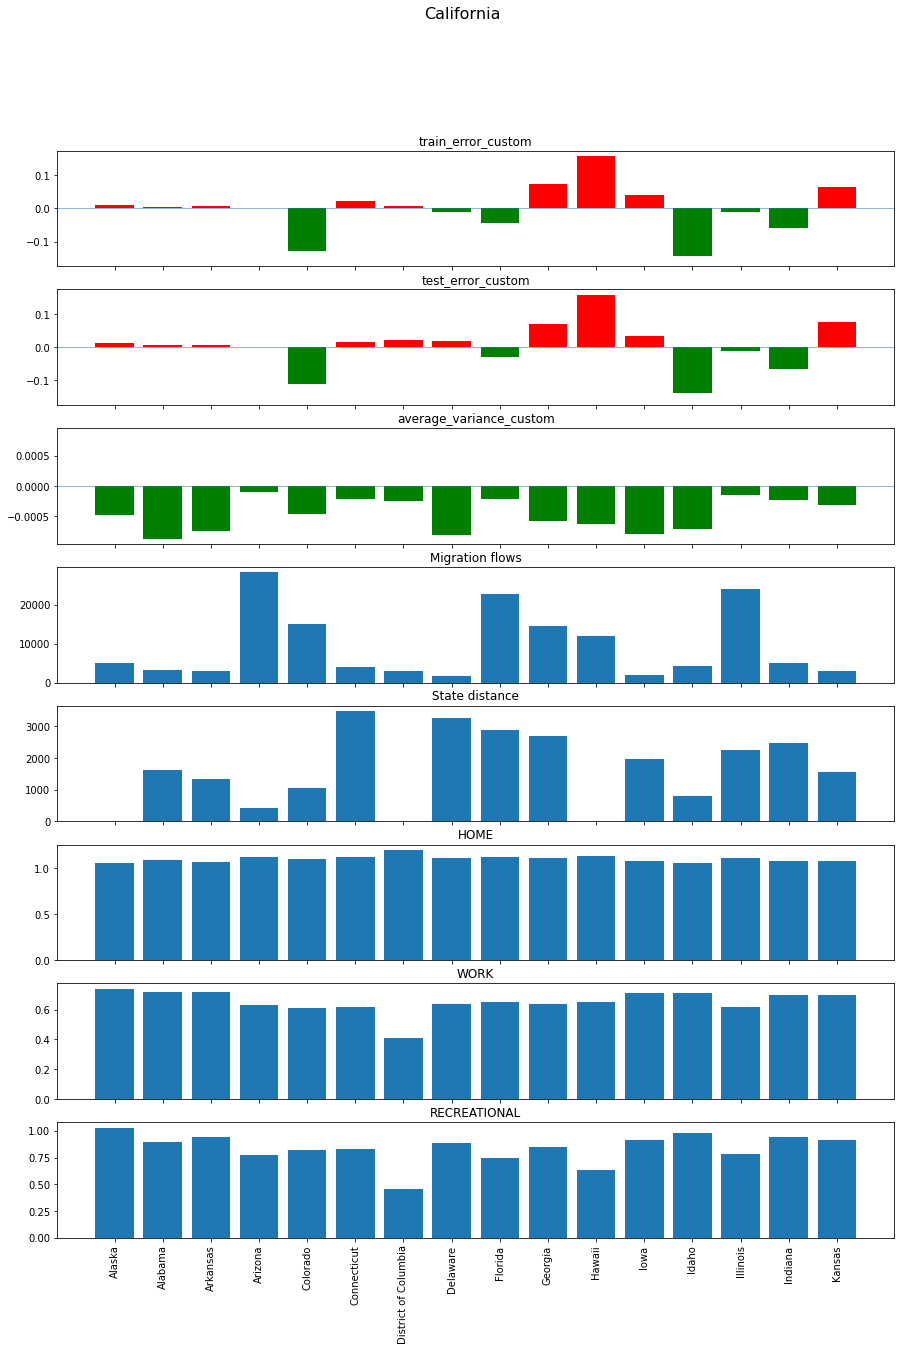

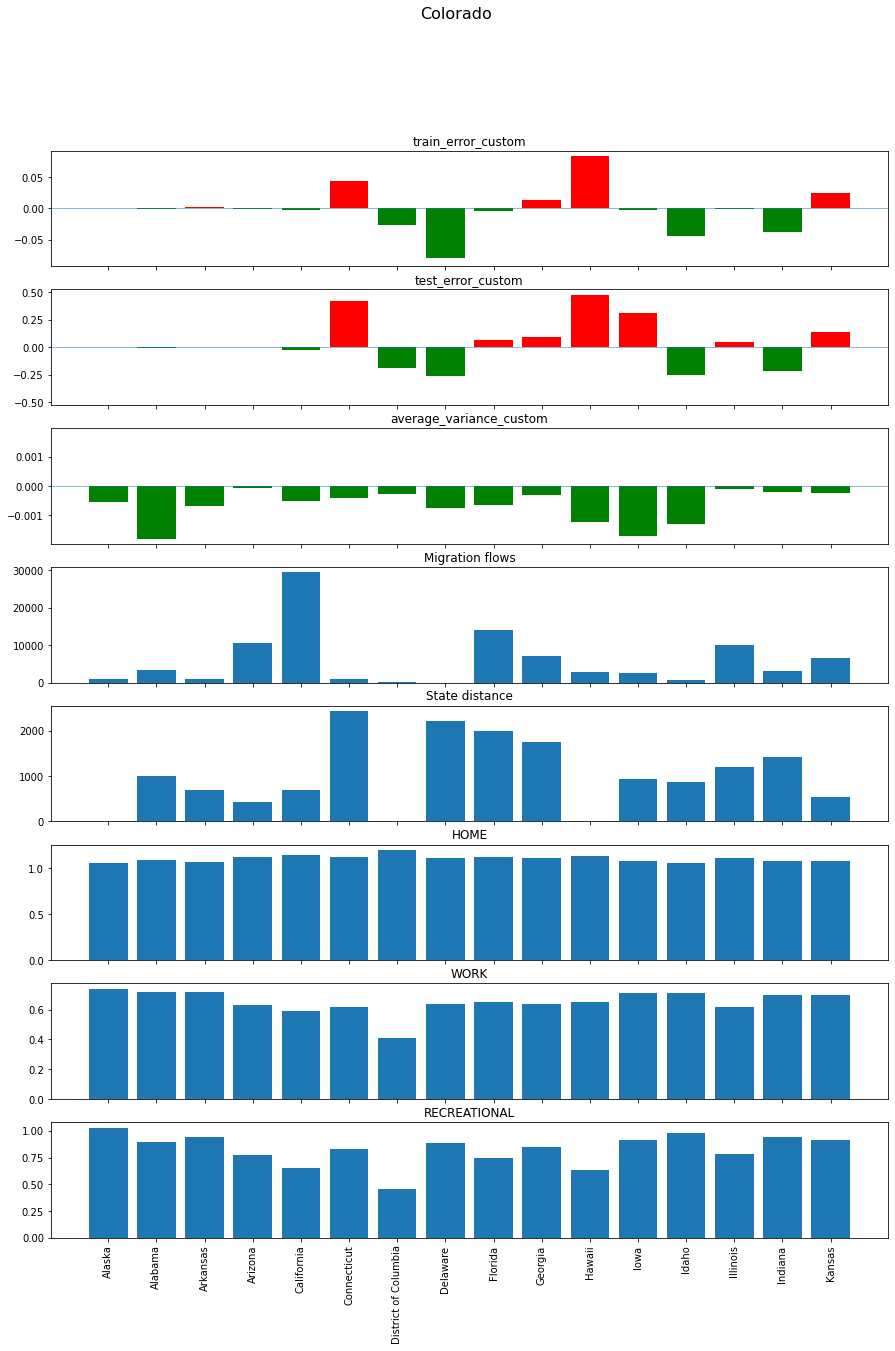

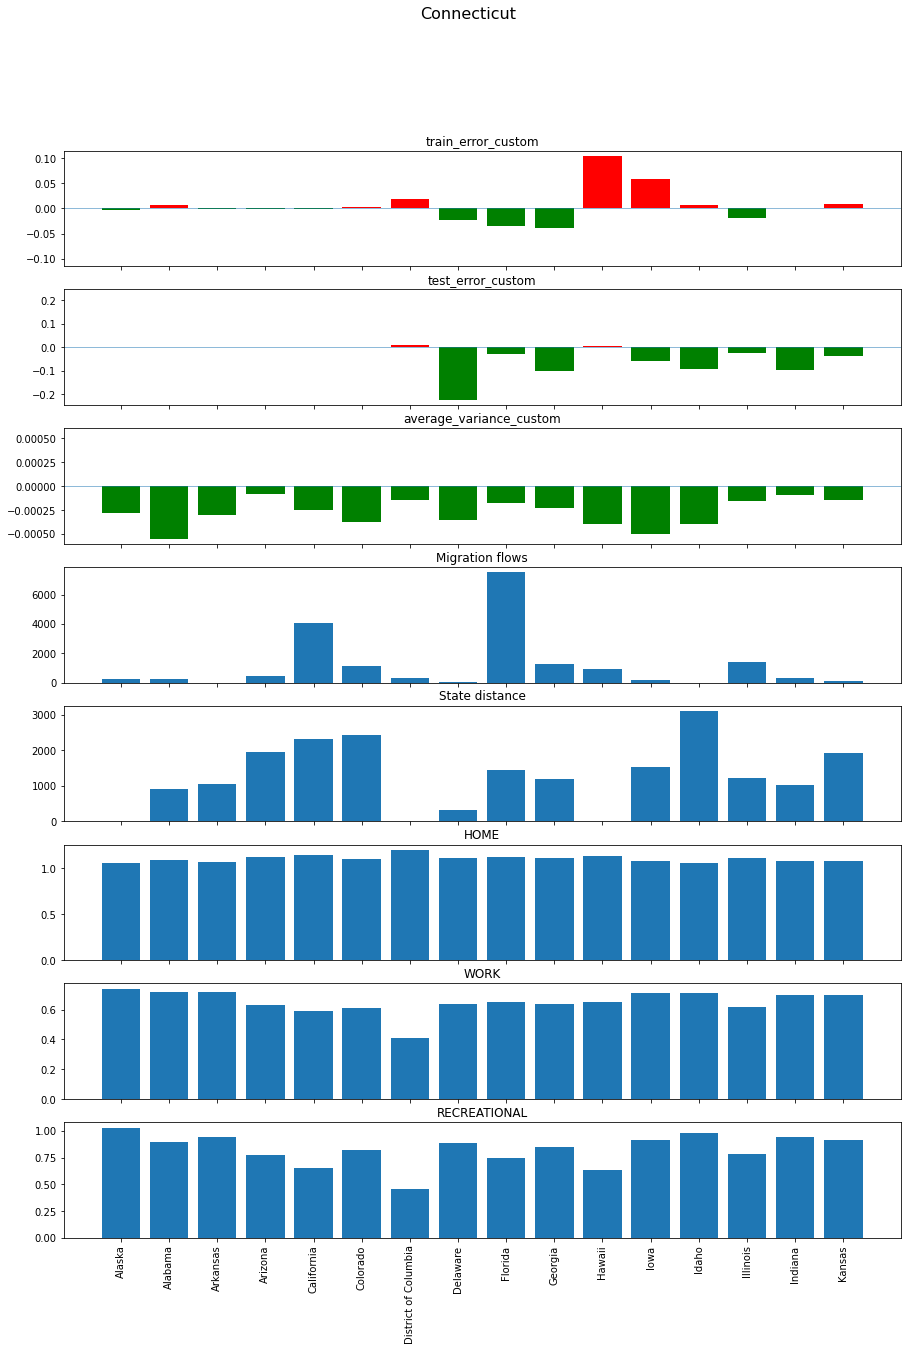

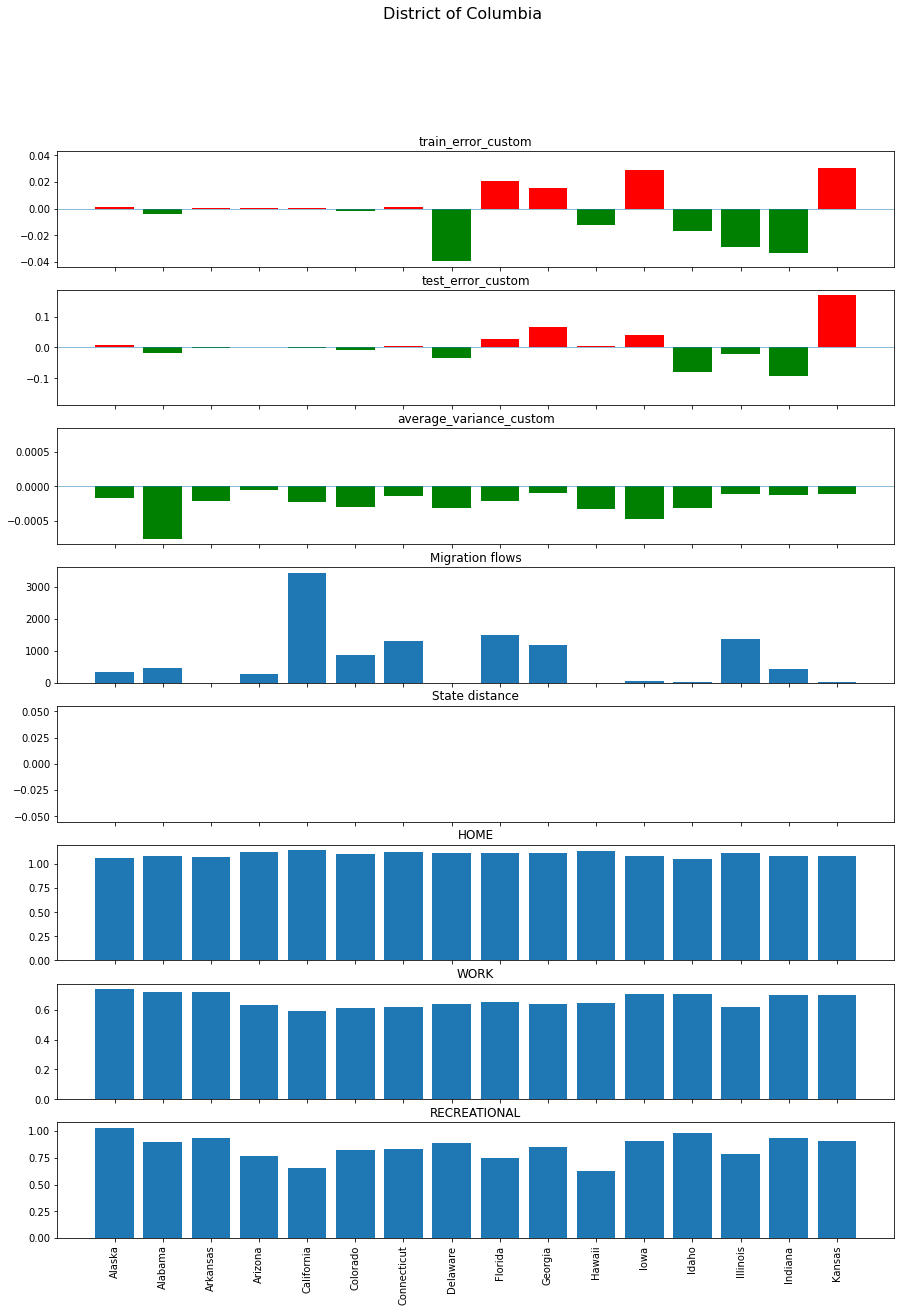

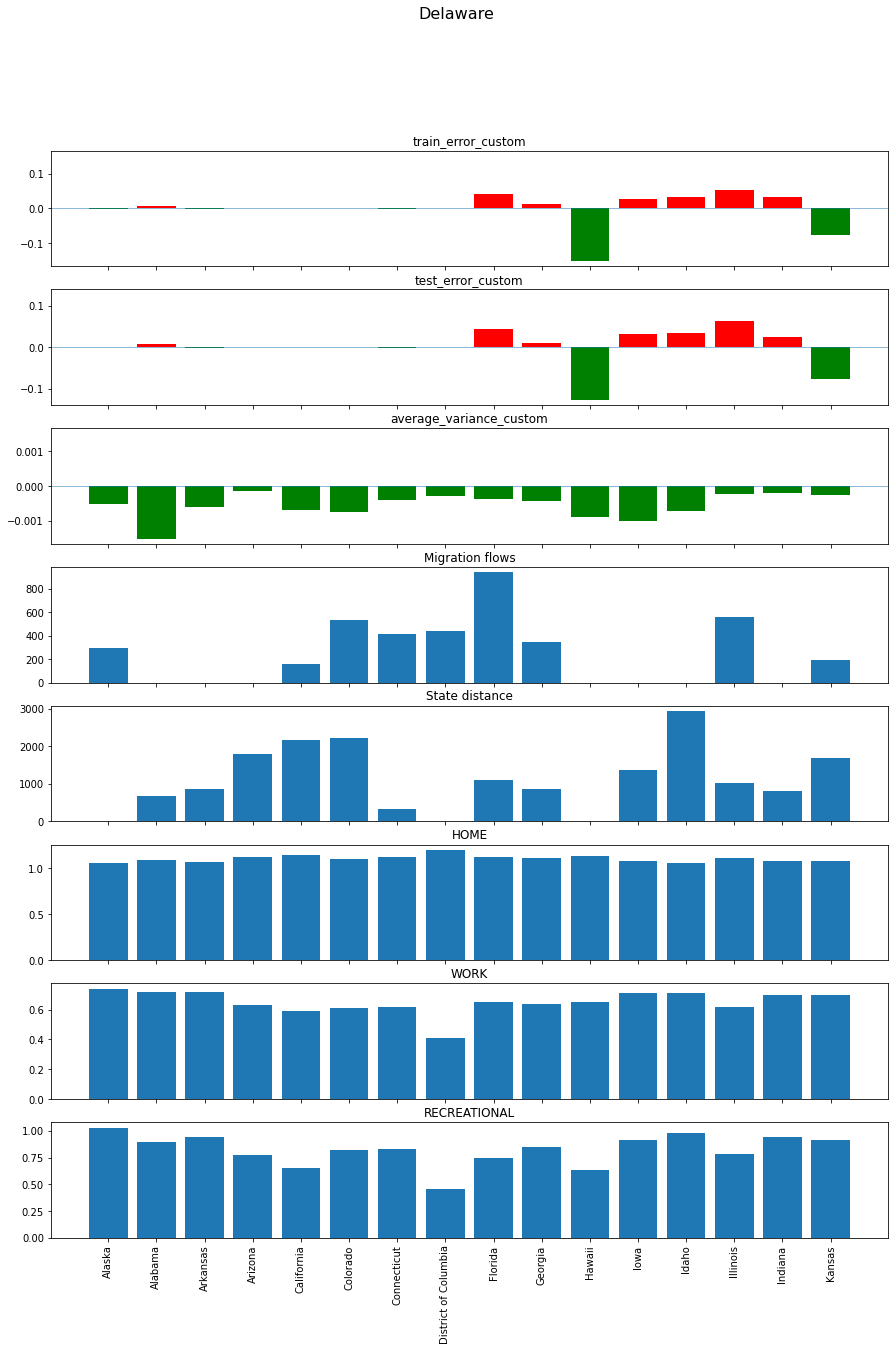

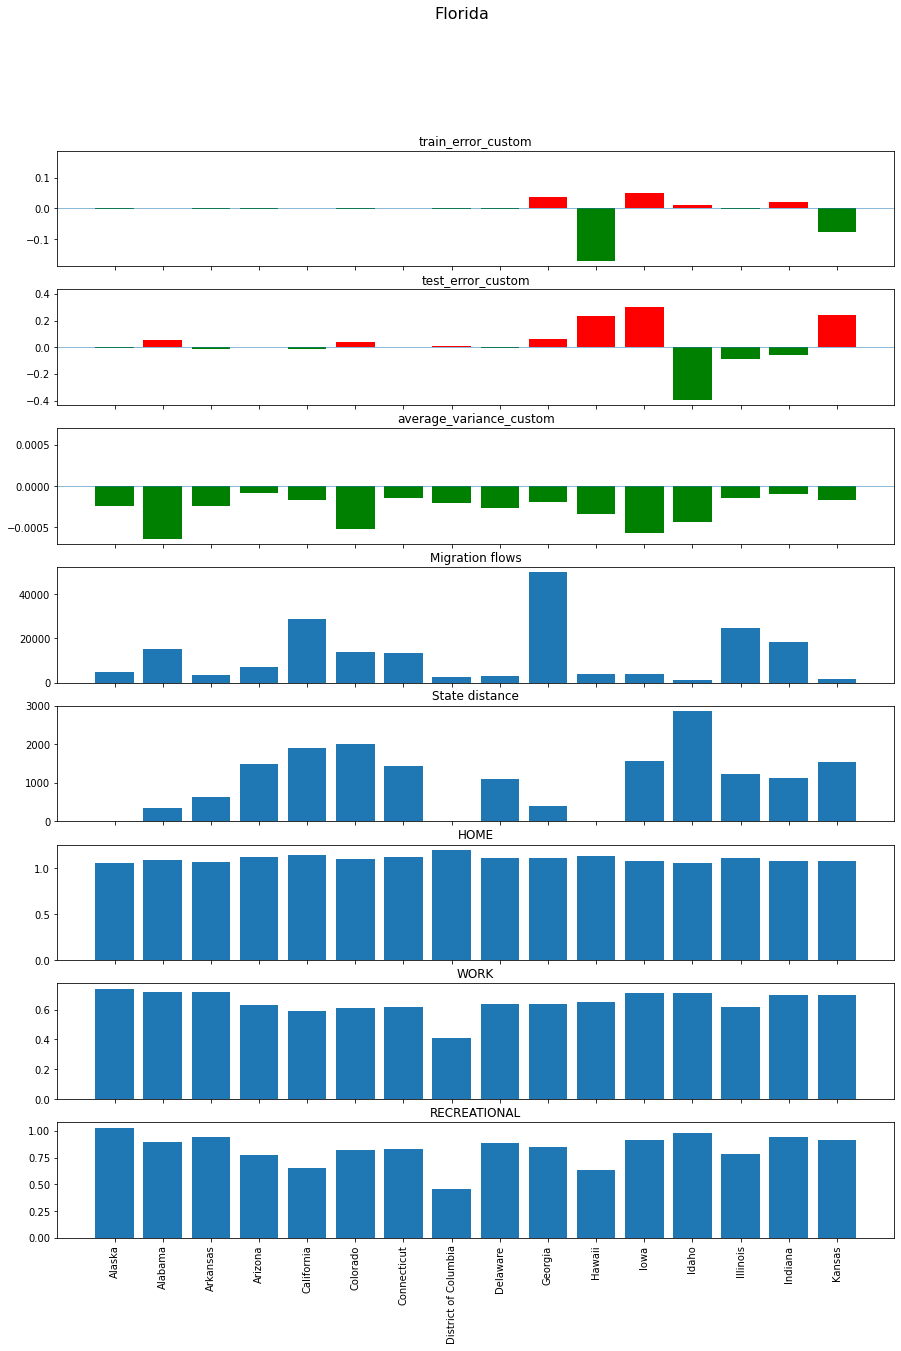

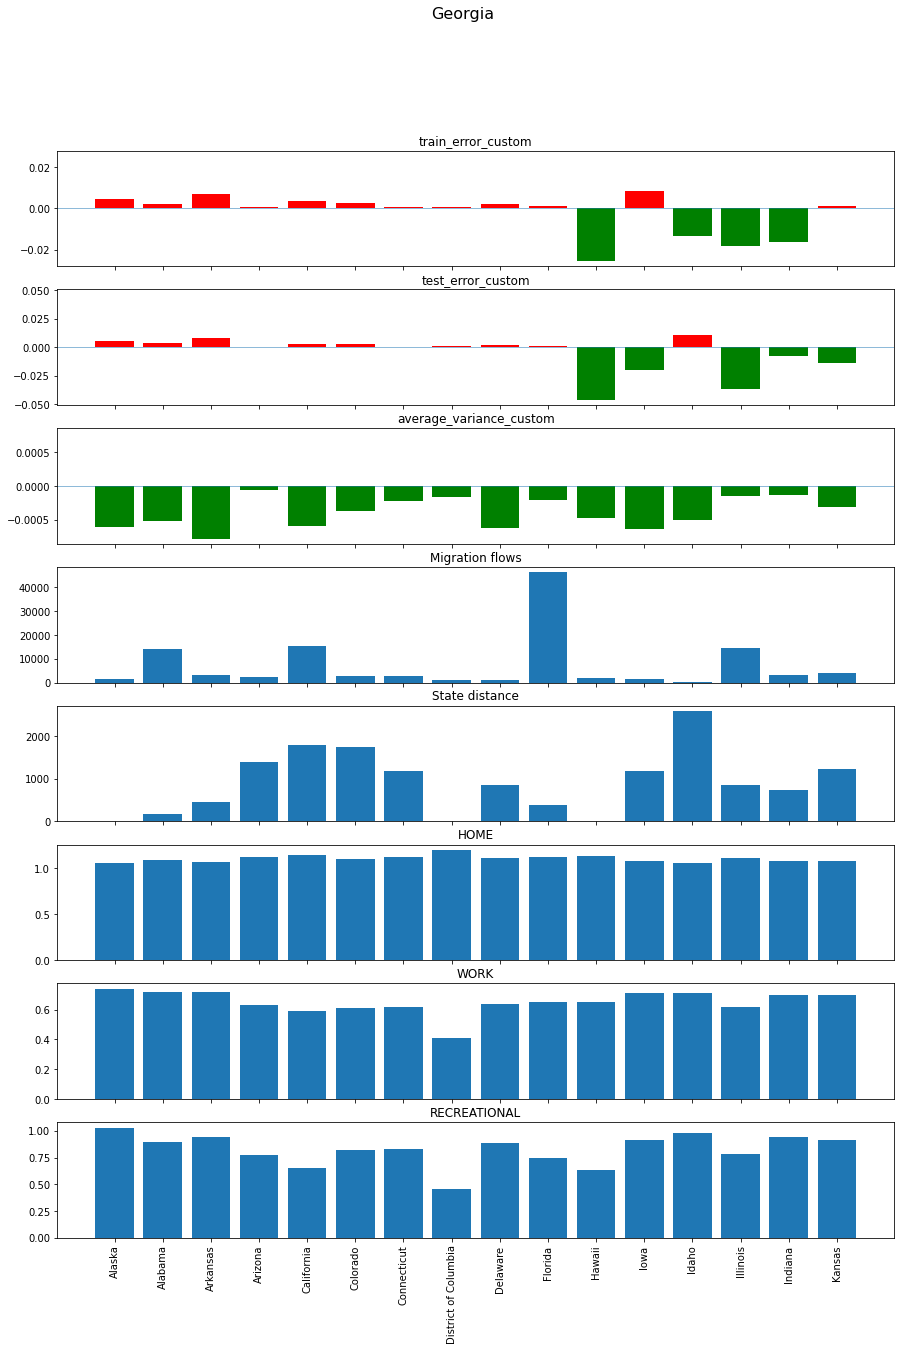

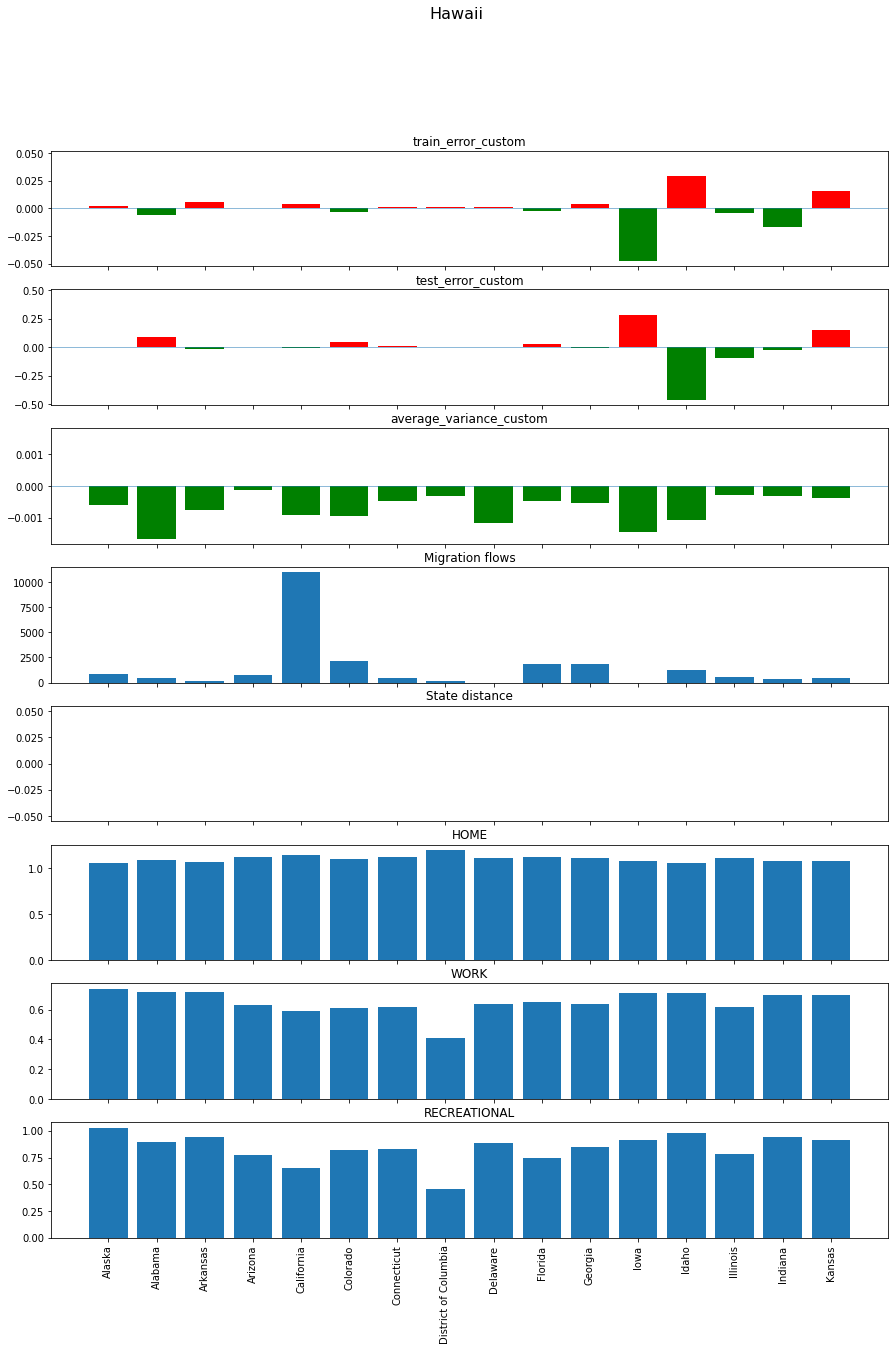

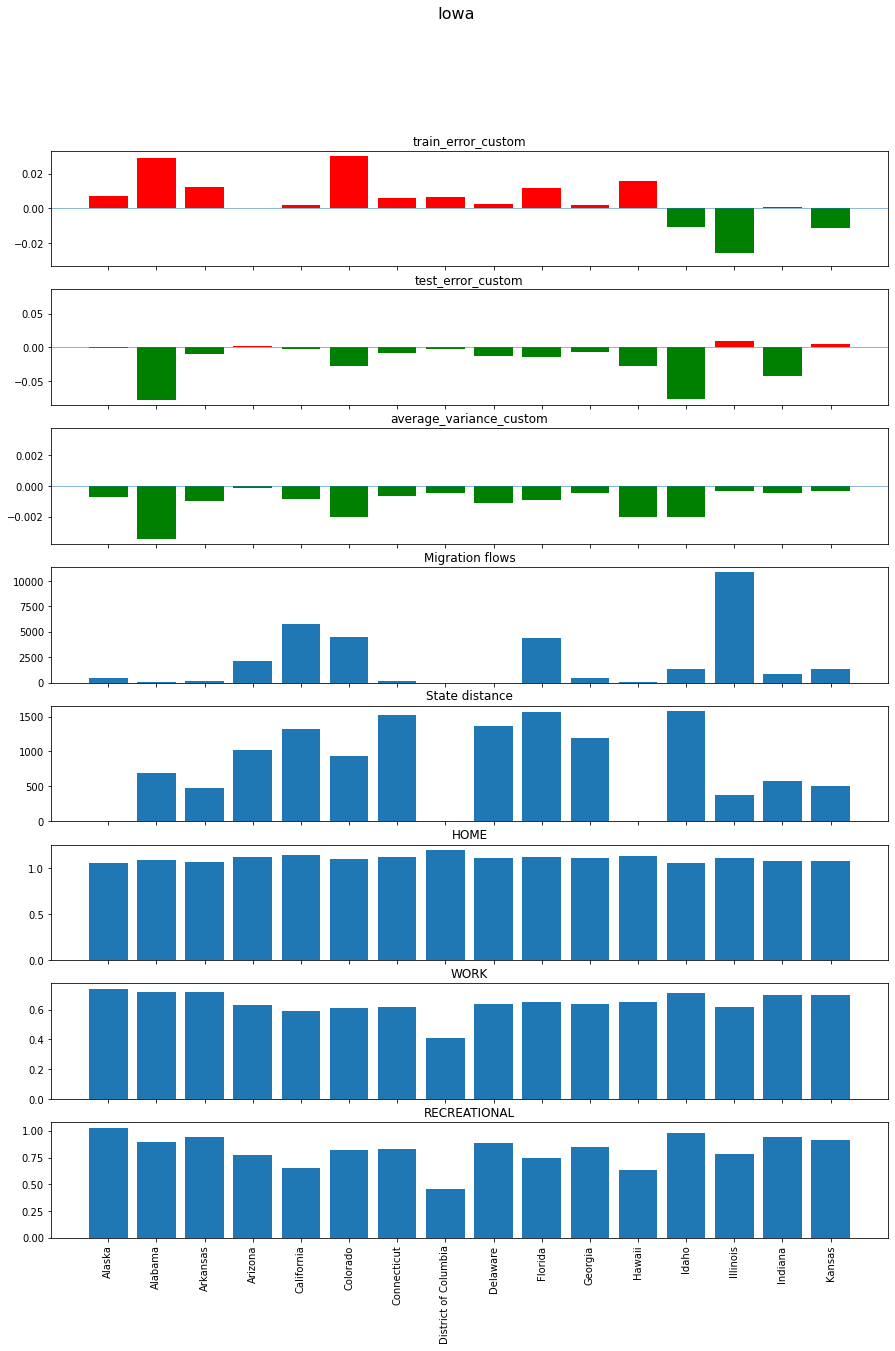

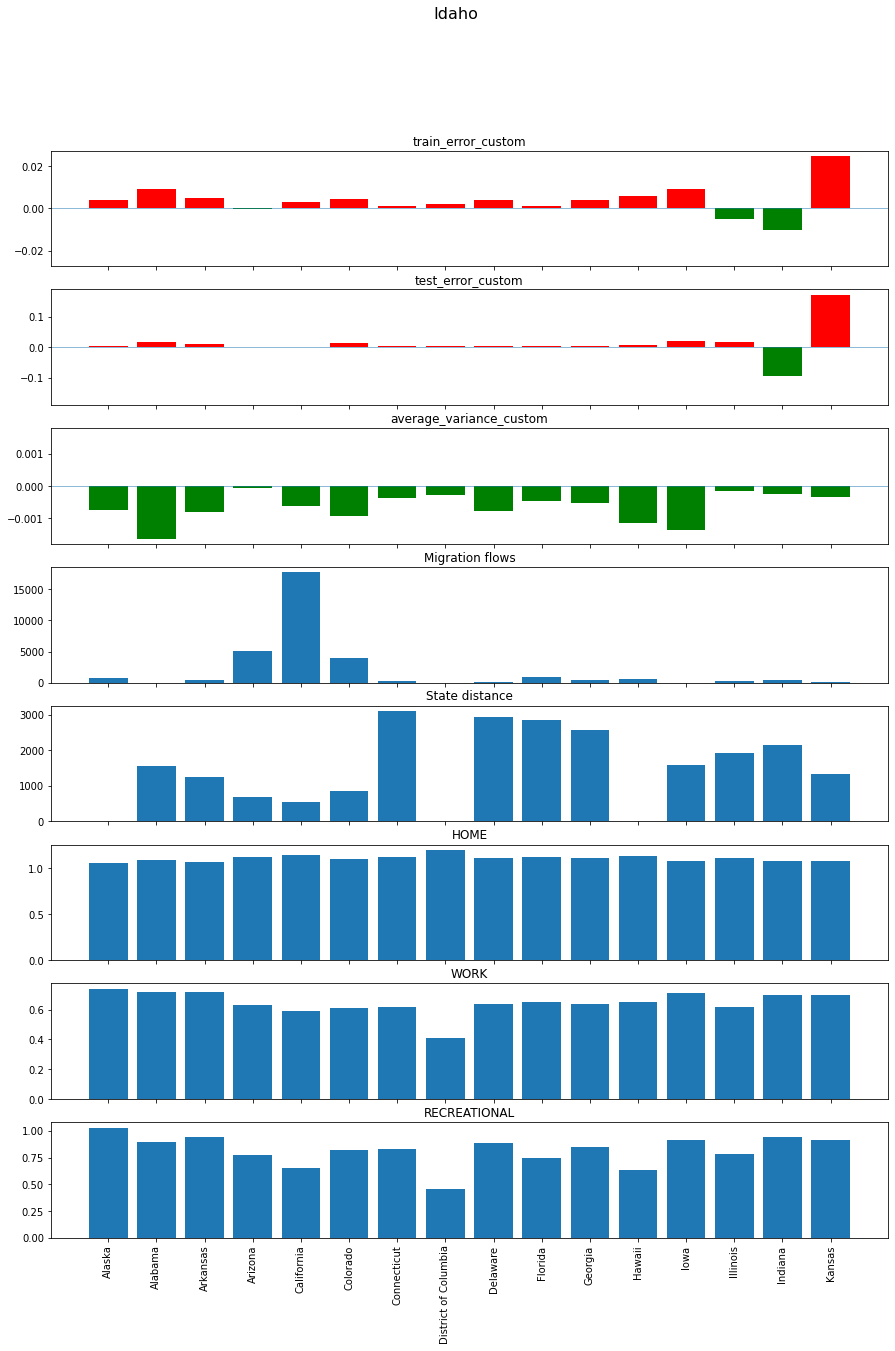

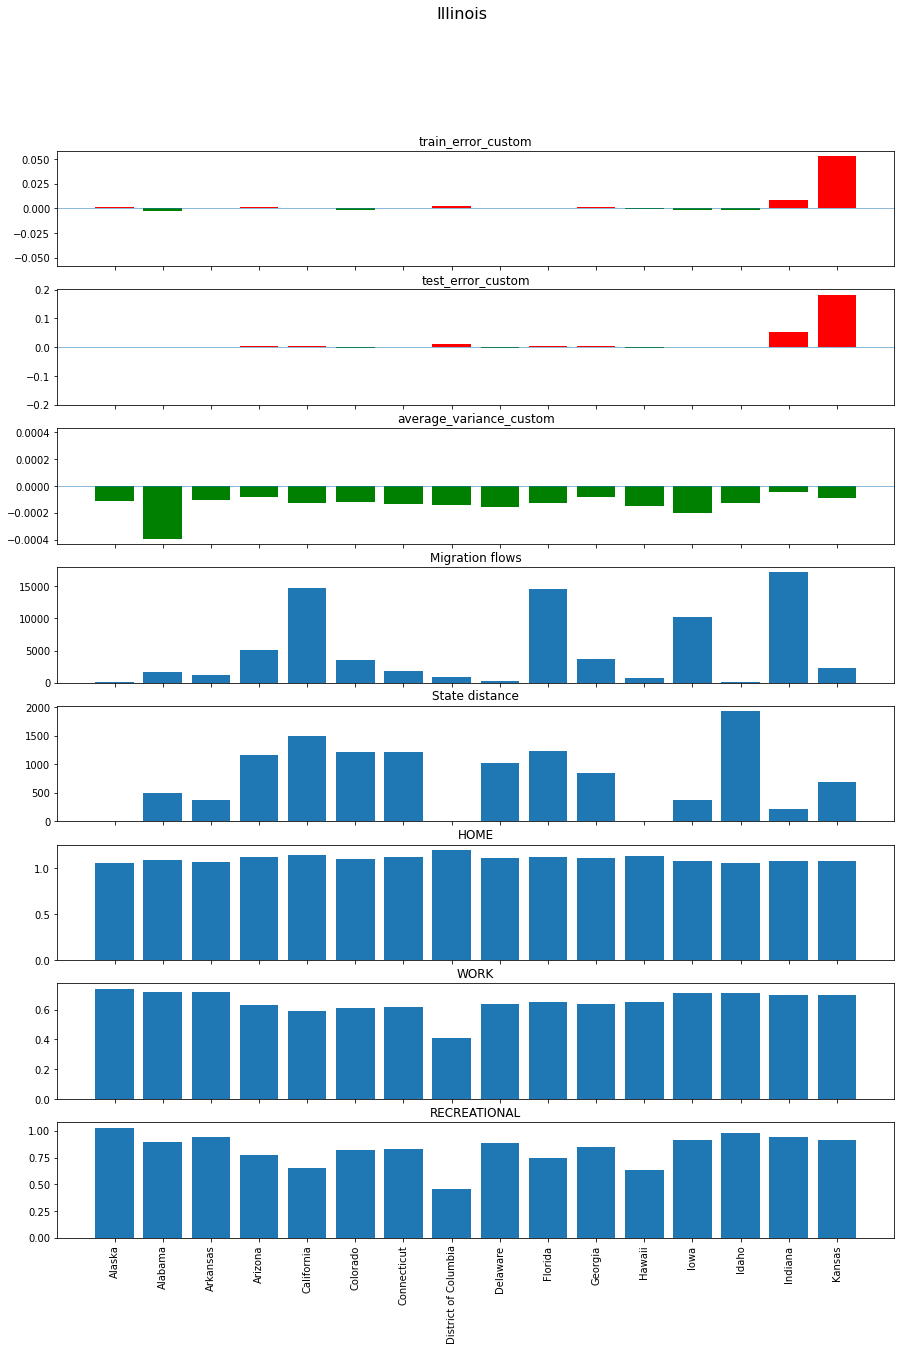

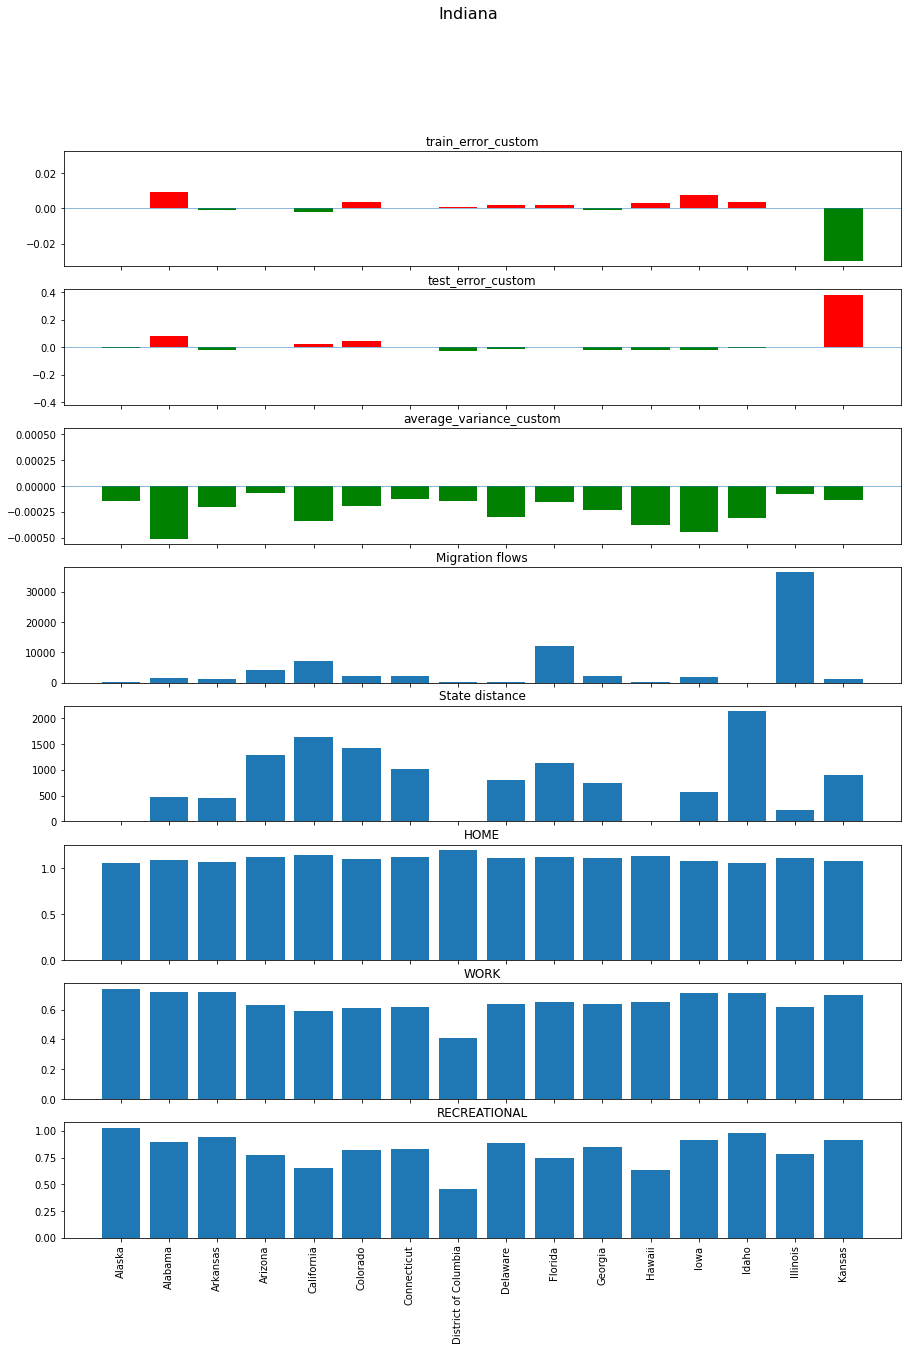

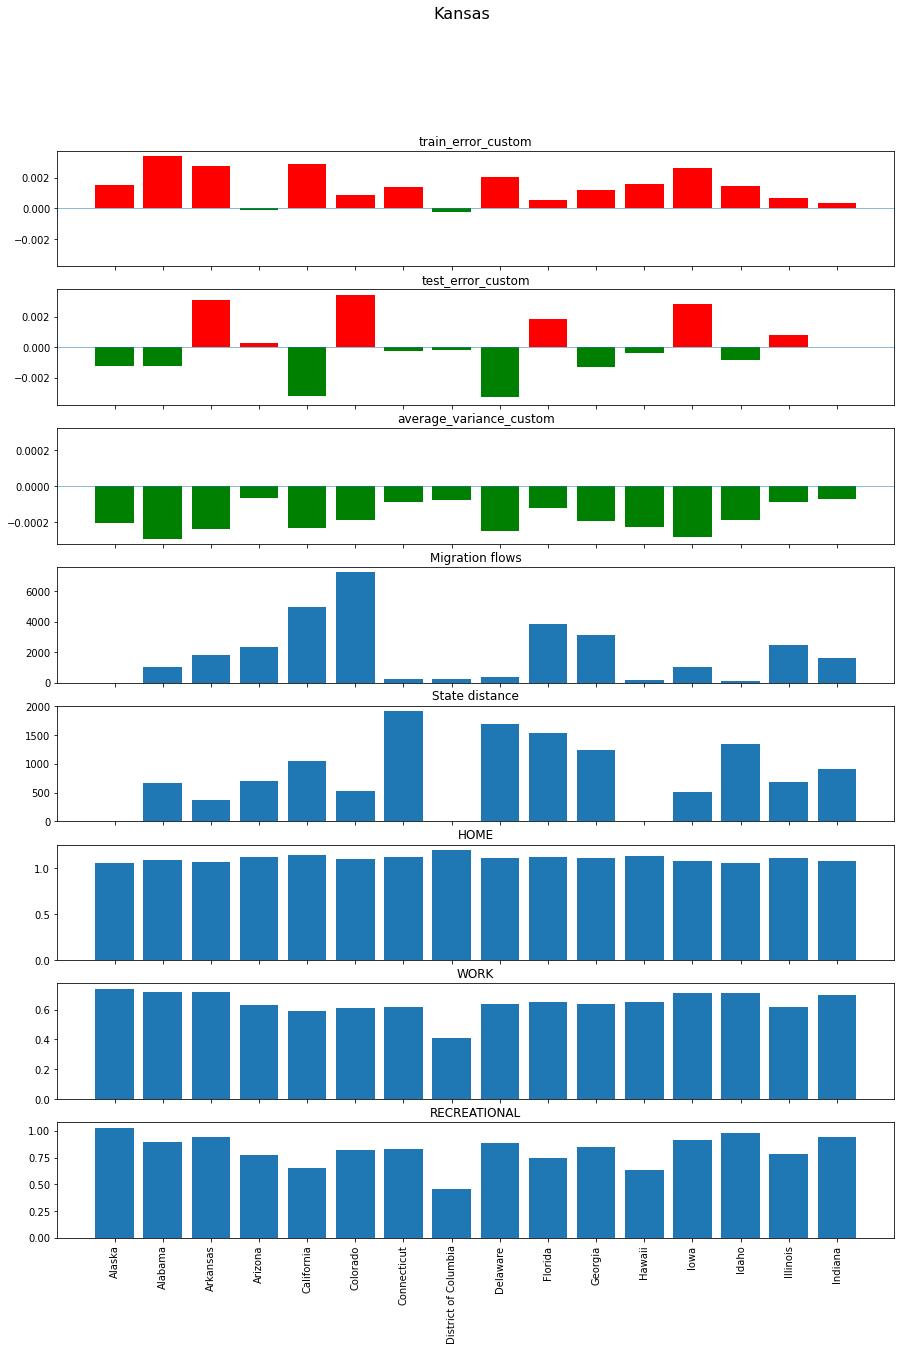

In [13]:
for s in STATES:
    plot_change_for_state(s)

In [8]:
train_error_changes = {(k1, k2): v for k1, kv in changes["train_error_custom"].items() for k2, v in kv.items()}
test_error_changes = {(k1, k2): v for k1, kv in changes["test_error_custom"].items() for k2, v in kv.items()}
avg_variance_changes = {(k1, k2): v for k1, kv in changes["average_variance_custom"].items() for k2, v in kv.items()}

Text(0.5, 1.0, 'train error changes (%)')

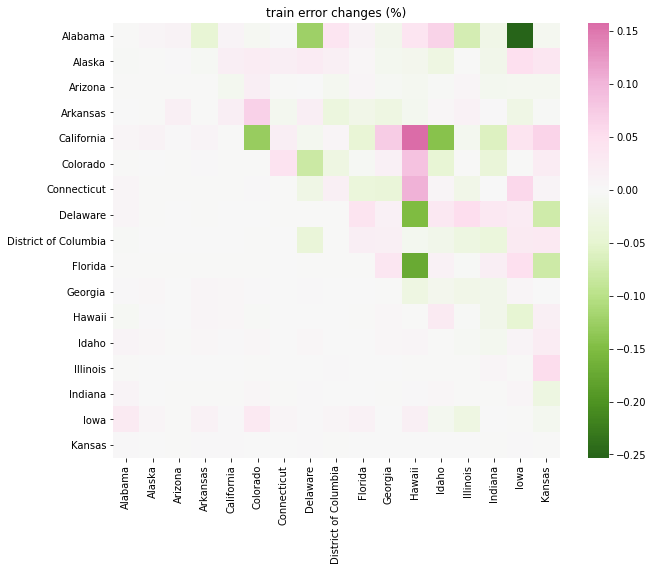

In [9]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(
    pd.Series(
        list(train_error_changes.values()),
        index=pd.MultiIndex.from_tuples(train_error_changes.keys())
    ).unstack().fillna(0),
    cmap="PiYG_r",
    center=0.0,
    ax=ax
)
ax.set_title("train error changes (%)")

Text(0.5, 1.0, 'test error changes (%)')

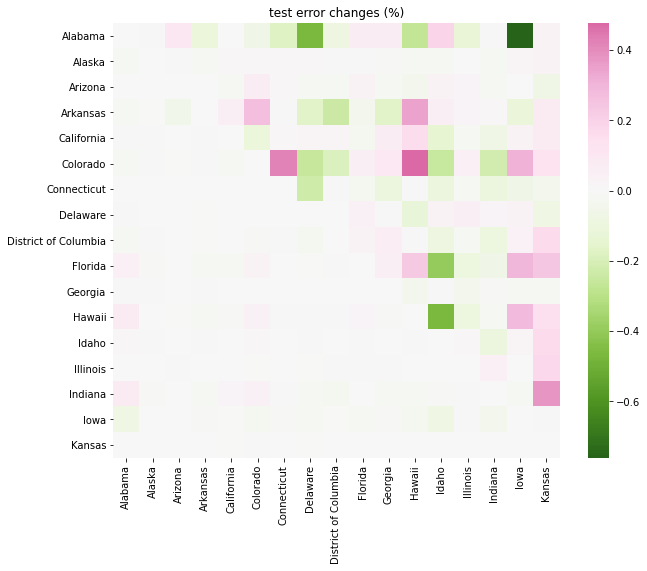

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(
    pd.Series(
        list(test_error_changes.values()),
        index=pd.MultiIndex.from_tuples(train_error_changes.keys())
    ).unstack().fillna(0),
    cmap="PiYG_r",
    center=0.0
)
ax.set_title("test error changes (%)")

Text(0.5, 1.0, 'average variance changes (%)')

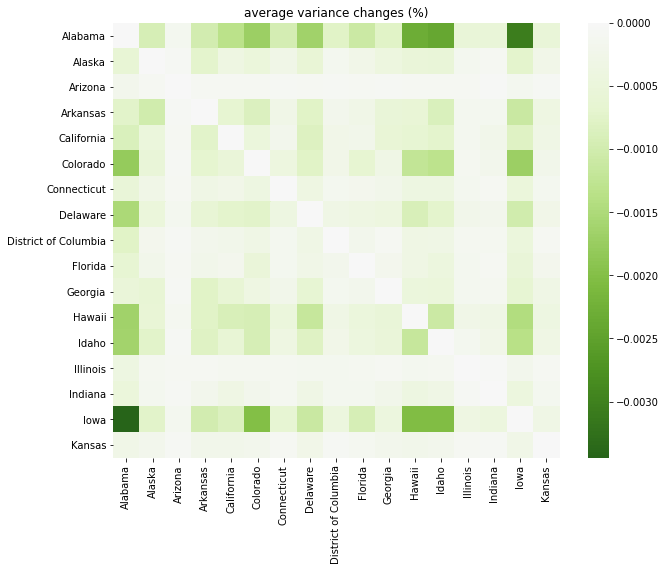

In [11]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(
    pd.Series(
        list(avg_variance_changes.values()),
        index=pd.MultiIndex.from_tuples(train_error_changes.keys())
    ).unstack().fillna(0),
    cmap="PiYG_r",
    center=0.0
)

ax.set_title("average variance changes (%)")